# Take-home project 1

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nekrut/bda/blob/main/Projects/Project%201.ipynb)

Write your PSU email address here: eka5370@psu.edu

Share the notebook with aun1@psu.edu

## Load the data

In [1]:
import pandas as pd

variants = pd.read_csv(
    "https://raw.githubusercontent.com/nekrut/bda/main/data/pf_variants.tsv",
    sep="\t"
)

variants.head()

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,EFFECT,IMPACT,GENE,AA_POS,HGVS_C,HGVS_P
0,ERR042228.fq,NC_004318.2,657697,T,C,324.0,14,0.857143,0,"1,0,13,0",intergenic_region,MODIFIER,PF3D7_0414500-PF3D7_0414600,-1,n.657697T>C,NaN
1,ERR042228.fq,NC_004318.2,658447,A,G,453.0,32,0.718750,11,"5,1,10,16",intergenic_region,MODIFIER,PF3D7_0414500-PF3D7_0414600,-1,n.658447A>G,NaN
2,ERR042228.fq,NC_004318.2,659163,C,A,1928.0,56,0.982143,0,"0,0,21,35",missense_variant,MODERATE,PF3D7_0414600,55,c.165G>T,p.Glu55Asp
3,ERR042228.fq,NC_004318.2,659167,C,T,1887.0,56,0.964286,0,"0,0,21,35",missense_variant,MODERATE,PF3D7_0414600,54,c.161G>A,p.Cys54Tyr
4,ERR042228.fq,NC_004318.2,660292,T,C,104.0,34,0.176471,0,"6,8,2,4",intergenic_region,MODIFIER,PF3D7_0414600-PF3D7_0414700,-1,n.660292T>C,NaN


## Instructions

Our goal is to understand whether the malaria parasite ([*Plasmodium falciparum*](https://brc-analytics.dev.clevercanary.com/data/organisms/5833)) infecting these individuals is resistant to [Pyrimethamine](https://en.wikipedia.org/wiki/Pyrimethamine)---an antimalarial drug. Resistance to Pyrimethamine is conferred by a mutation in `PF3D7_0417200` (*dhfr*) gene [Cowman1988](https://doi.org/10.1073/pnas.85.23.9109). Given sequencing data from four individuals we will determine which one of them is infected with a *Plasmodium falciparum* carrying mutations in this gene.

Variant calls in the provided Pandas data frame represent analysis of four samples: two from Ivory Coast and two from Colombia:

| Accession | Location |
|------------|------------|
| [ERR636434](https://www.ncbi.nlm.nih.gov/sra/?term=ERR636434) | Ivory coast |
| [ERR636028](https://www.ncbi.nlm.nih.gov/sra/?term=ERR636028) | Ivory coast |
| [ERR042232](https://www.ncbi.nlm.nih.gov/sra/?term=ERR042232) | Colombia |
| [ERR042228](https://www.ncbi.nlm.nih.gov/sra/?term=ERR042228) | Colombia |

These accessions correspond to datasets stored in the [Sequence Read Archive](https://www.ncbi.nlm.nih.gov/sra) at NCBI.

(data from [MalariaGen](https://www.malariagen.net/data_package/open-dataset-plasmodium-falciparum-v70/) )

## Specifics

- Filter variants falling within the *dhfr* gene
- Restrict variants to missense variants only using the effect column.
- You are specifically interested in variant at amino acid position 108
- Create a graph that shows samples vs variant coordinates, in which graph marks are proportional to alternative allele frequencies (**AF** column)
- Create a graph showing a world map in which allele frequencies of these two samples are represented as pie charts within the map of Colombia and within the map of Ivory Coast.  to be more specific, for each location you have two samples. Each of these samples will have an allele frequency at the resistance side. Use these allele frequencies as areas on the pie chart

> You can use any AI you want (preferably the one integrated in Colab) but you will never get exactly what you want, so you will have to adjust it. You will have to explain to me what the steps were.


In [10]:
#//First I used gemini online. I gave it a summary of what I wanted,
#//the pandas and variant code lines, and then copied and pasted the
#//specifics
#//For clarification I will be writing comments with // before hand while
#//any comments lacking this are from the AI

In [15]:
#//First it gave me the following code for loading/filtering data
import pandas as pd
import re

# 1. Load Data
variants = pd.read_csv(
    "https://raw.githubusercontent.com/nekrut/bda/main/data/pf_variants.tsv",
    sep="\t"
)

# 2. Filter for dhfr gene and missense variants
# Note: The gene name in the file might be the ID 'PF3D7_0417200'
dhfr_variants = variants[
    (variants['GENE'] == 'PF3D7_0417200') & # Corrected 'Gene' to 'GENE'
    (variants['EFFECT'] == 'missense_variant') # Corrected 'effect' to 'EFFECT'
].copy()

# 3. Extract Amino Acid Position
# The 'HGVS_P' column usually looks like 'p.Ser108Asn'. We need the number.
# We use regex to extract the first sequence of digits found in the string.
def get_aa_pos(p_change):
    match = re.search(r'(\d+)', str(p_change)) # Corrected regex from r'(\\d+)' to r'(\d+)'
    return int(match.group(1)) if match else None

dhfr_variants['aa_pos'] = dhfr_variants['HGVS_P'].apply(get_aa_pos) # Corrected 'p_change' to 'HGVS_P'

# 4. Filter specifically for position 108 for the resistance analysis
s108_variants = dhfr_variants[dhfr_variants['aa_pos'] == 108]

print("Variants at Amino Acid 108:")
print(s108_variants[['Sample', 'HGVS_P', 'AF', 'aa_pos']]) # Corrected 'p_change' to 'HGVS_P'


Variants at Amino Acid 108:
           Sample       HGVS_P        AF  aa_pos
147  ERR042228.fq  p.Ser108Asn  0.957143     108
830  ERR636028.fq  p.Ser108Asn  0.991416     108


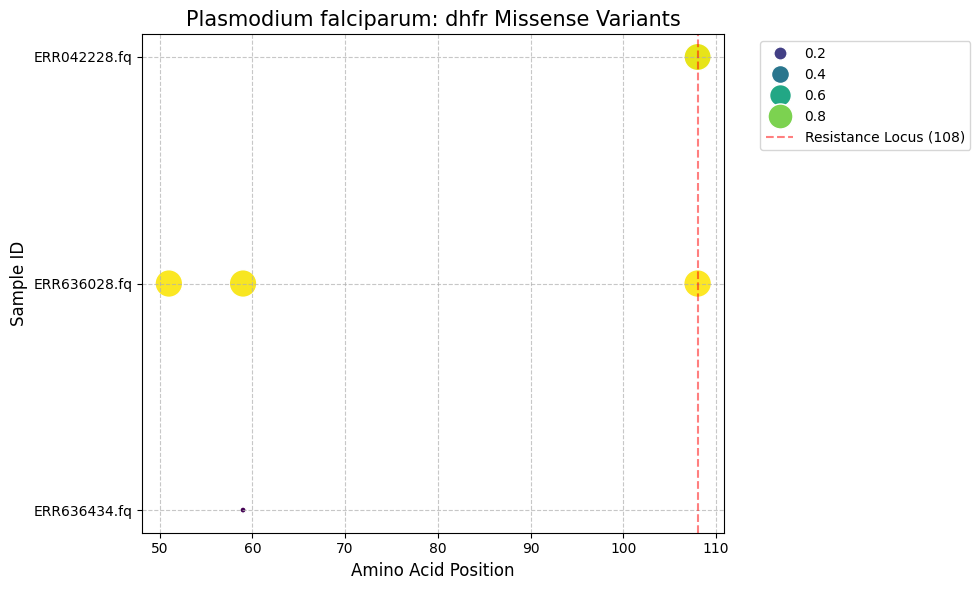

In [17]:
#//then it gave me this for plotting samples vs. variant coordinates
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the scatter plot
# X-axis: Amino Acid Position (aa_pos) or Genomic Position (POS)
# Y-axis: Sample Name
# Size: AF (scaled up for visibility)
sns.scatterplot(
    data=dhfr_variants,
    x='aa_pos',
    y='Sample',
    size='AF',
    sizes=(20, 400), # Range of bubble sizes
    hue='AF',        # Color by frequency as well
    palette='viridis',
    legend='brief'
)

plt.title('Plasmodium falciparum: dhfr Missense Variants', fontsize=15)
plt.xlabel('Amino Acid Position', fontsize=12)
plt.ylabel('Sample ID', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Highlight position 108 specifically
plt.axvline(x=108, color='red', linestyle='--', alpha=0.5, label='Resistance Locus (108)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [16]:
#//Finally it gave this for the world map with allele frequency pie charts
import geopandas as gpd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#//Needed to install geopandas geodatasets (already satisfied, but keeping for completeness)
!pip install geodatasets
import geodatasets

# --- CONFIGURATION ---
# Define coordinates for the countries
locations = {
    'Colombia': {'lat': 4.5709, 'lon': -74.2973},
    'Ivory Coast': {'lat': 7.5400, 'lon': -5.5471}
}

# MAP SAMPLES TO LOCATIONS based on problem description (updated with correct IDs and .fq suffix)
sample_map = {
    'Colombia': ['ERR042232.fq', 'ERR042228.fq'],
    'Ivory Coast': ['ERR636434.fq', 'ERR636028.fq']
}
# ---------------------

# 1. Calculate Average Allele Frequency for the Resistance Mutation (Pos 108) per Country
country_af = {}

for country, samples_in_country_map in sample_map.items():
    afs_for_country = []
    for sample_id in samples_in_country_map:
        # Check if this sample_id has a variant at 108 in the filtered data
        matching_variant = s108_variants[s108_variants['Sample'] == sample_id]

        if not matching_variant.empty:
            # If variant found, add its AF
            afs_for_country.append(matching_variant['AF'].iloc[0]) # Assumes only one entry per sample at 108
        else:
            # If no variant at 108 for this sample, assume AF is 0 (wild type)
            afs_for_country.append(0.0)

    if afs_for_country:
        country_af[country] = sum(afs_for_country) / len(afs_for_country)
    else:
        country_af[country] = 0.0 # Fallback, though should not be needed with fixed sample_map

# 2. Plotting the Map
# Load world map data directly from Natural Earth (bypassing geodatasets.get_path issues)
# Using a direct URL for robustness
world = gpd.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip")

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='white')

# Function to add pie charts at specific coordinates
def add_pie_chart(ax, lat, lon, af_value, country_name):
    # Define pie chart ratios: [Resistance AF, Wild Type (1-AF)]
    ratios = [af_value, 1 - af_value]

    # Create an inset axis at the map coordinates
    # We transform map coords (lon/lat) to display coords for placement
    sub_ax = inset_axes(ax, width=0.8, height=0.8,
                        bbox_transform=ax.transData,
                        bbox_to_anchor=(lon, lat),
                        loc=10) # 10 = center

    # Plot Pie
    sub_ax.pie(ratios, colors=['crimson', 'cornflowerblue'], startangle=90)

    # Add label near the pie
    ax.text(lon, lat - 5, f"{country_name}\nAvg AF: {af_value:.2f}",
            ha='center', fontsize=10, fontweight='bold')

# Loop through locations and add pies
for country, coords in locations.items():
    af = country_af.get(country, 0)
    add_pie_chart(ax, coords['lat'], coords['lon'], af, country)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='crimson', label='Resistant (Mutant)'),
    Patch(facecolor='cornflowerblue', label='Sensitive (Wild Type)')
]
ax.legend(handles=legend_elements, loc='lower left', title="Allele Status")

plt.title('Pyrimethamine Resistance (dhfr S108N) Frequency by Location', fontsize=16)
plt.xlim(-130, 20) # Crop map to focus on Atlantic/Africa/S.America
plt.ylim(-40, 40)
plt.show()


ValueError: No matching item found for the query 'naturalearth_lowres'.

In [ ]:
#//After going through the code again I asked the built in gemini again and it said the value error I got was due to the lack
#//of the term naturalearth_lowres as the geodatasets library typically uses naturalearth.world. When this change occurred
#//it further broke the code and the AI chat agent went back to the original naturalearth_lowres